Example use PyDSTool
Install: pip3 install PyDSTool

In [1]:
import PyDSTool as dst
from PyDSTool import args
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# we must give a name
DSargs = dst.args(name='ENSO')
# parameters
DSargs.pars = { 'a': 6.8927,
                'c': 2.3952,
                'k': 0.4032,
                'rho': 0.3224,
                'delta': 0.1
                 }
# rhs of the differential equation
xstr = 'rho*delta*x*(x-a)+x*(x+y+c-c*tanh(x+z))'
ystr = '-rho*delta*(a*y + x*x)'
zstr = 'delta*(k - z - x/2)'
DSargs.varspecs = {'x': xstr, 'y': ystr, 'z': zstr}
# initial conditions
DSargs.ics      = {'x': -2, 'y': -0.5, 'z': 1.52}

[-2.         -2.15267364 -2.33981042 ... -2.77461334 -2.77461335
 -2.77461335]
[-0.5        -0.50272927 -0.50774382 ... -1.11690218 -1.1169022
 -1.11690223]
[1.52       1.51920372 1.51926164 ... 1.79050533 1.79050534 1.79050535]


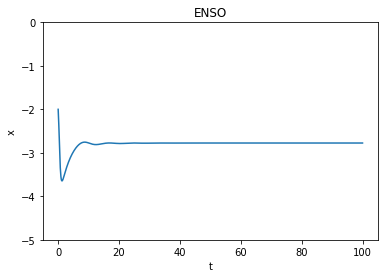

In [9]:
DSargs.tdomain = [0,100]                        # set the range of integration.
ode  = dst.Generator.Vode_ODEsystem(DSargs)     # an instance of the 'Generator' class.
traj = ode.compute('polarization')              # integrate ODE
pts  = traj.sample(dt=0.1)                      # Data for plotting

# PyPlot commands
plt.plot(pts['t'], pts['x'])
print(pts['x'])
print(pts['y'])
print(pts['z'])
plt.xlabel('t')                                 
plt.ylabel('x')                                 
plt.ylim([-5,0])                                
plt.title(ode.name)                             
plt.show()

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

H Point found 
Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

H Point found 
Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 



/Users/dijkstra1_henk/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Bifurcation diagram ENSO')

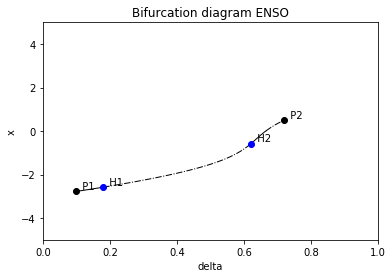

In [10]:
# Prepare the system to start close to a steady state
ode.set(pars = {'delta': 0.1} )       # Lower bound of the control parameter 
ode.set(ics =  {'x':-2.77461335, 'y': -1.11690223, 'z': 1.79050535} )  # Close to one of the steady states present for this parameter

PC = dst.ContClass(ode)         # Set up continuation class

PCargs = dst.args(name='EQ1', type='EP-C')    # 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs.freepars     = ['delta']               # control parameter(s) (it should be among those specified in DSargs.pars)
PCargs.MaxNumPoints = 200                     # The following 3 parameters are set after trial-and-error
PCargs.MaxStepSize  = 0.01
PCargs.MinStepSize  = 1e-5
PCargs.StepSize     = 2e-2
PCargs.LocBifPoints = 'H'                     # detect Hopf bifurcations
PCargs.SaveEigen    = True                    # to tell unstable from stable branches
PC.newCurve(PCargs)
PC['EQ1'].forward()
PC.display(['delta','x'], stability=True, figure=3)  # stable and unstable branches as solid and dashed curves, resp.
plt.xlim(0,1.0)
plt.ylim(-5,5)
plt.title("Bifurcation diagram ENSO")